In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,roc_curve, roc_auc_score

In [3]:
#Dataset similado
np.random.seed(42)
edad = np.random.randint(18,60,50)
ingresos = np.random.randint(20000,100000,50)
compra = (0.3*(edad) + 0.00005*(ingresos) + np.random.randn(50)*2>20).astype(int)

df = pd.DataFrame({'Edad':edad,'Ingresos':ingresos,'Compra':compra})
df.head(5)

,Edad,Ingresos,Compra
0,56,55920,0
1,46,87121,1
2,32,89479,0
3,25,39457,0
4,38,86557,0


## Ejercicio 1: Comprender la naturaleza de la regresión logística

Objetivo: visualizar por qué usamos regresión logística para clasificación.

Instrucciones:

Grafica la relación entre Edad y Compra.

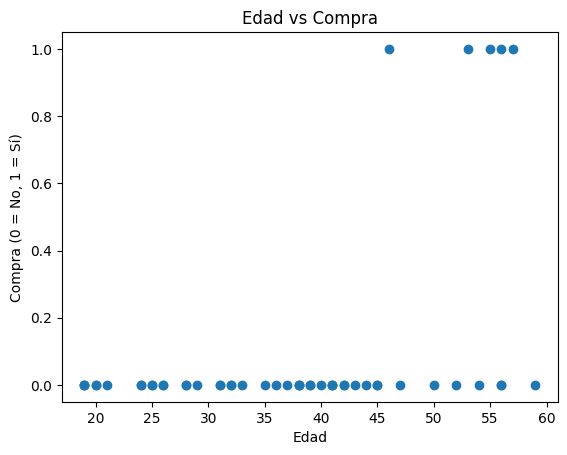

In [4]:
plt.scatter(df['Edad'],df['Compra'])
plt.xlabel('Edad')
plt.ylabel('Compra (0 = No, 1 = Sí)')
plt.title('Edad vs Compra')
plt.show()

## Ejercicio 2: Entrenar el modelo y observar la función sigmoide

Objetivo: comprender cómo la función sigmoide transforma una salida lineal en una probabilidad.

Instrucciones:

Entrena una regresión logística con Edad como predictor.

Calcula las probabilidades y grafícalas.

D:\Python\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Python\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


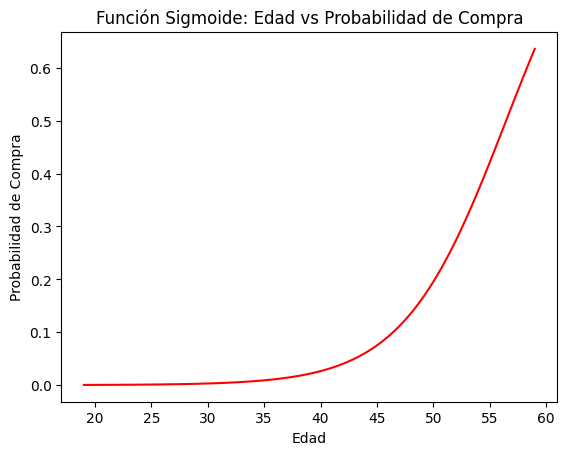

In [6]:
X =df[['Edad']]
y = df[['Compra']]

modelo = LogisticRegression()
modelo.fit(X,y)

edad_range = np.linspace(df['Edad'].min(),df['Edad'].max(),100).reshape(-1,1)
#Aquí que se hace?
#Este método del modelo devuelve la probabilidad estimada de pertenecer a cada clase posible (en este caso, clase 0 o clase 1).
proba=modelo.predict_proba(edad_range)[:,1]

plt.plot(edad_range, proba, color='red')
plt.xlabel('Edad')
plt.ylabel('Probabilidad de Compra')
plt.title('Función Sigmoide: Edad vs Probabilidad de Compra')
plt.show()

[:, 1]

Selecciona únicamente la segunda columna (índice 1), que representa la probabilidad de la clase positiva (1 = “Compra”).

Es decir, de la matriz anterior, te quedarías con [0.2, 0.6, 0.9].

Resultado final:
proba contiene una lista de probabilidades que el modelo asigna a la clase positiva, para cada valor de edad en edad_range.

## Ejercicio 3: Interpretar coeficientes

Objetivo: entender cómo interpretar los coeficientes del modelo.

In [7]:
coef = modelo.coef_[0][0]
intercept = modelo.intercept_[0]

print(f'Coeficiente de Edad: {coef:.3f}')
print(f'Intercepto: {intercept:.3f}')

Coeficiente de Edad: 0.219
Intercepto: -12.376


Si el coeficiente es positivo → a mayor edad, mayor probabilidad de compra.

Si es negativo → a mayor edad, menor probabilidad.

## Ejercicio 4: Predicciones y umbral de decisión

Objetivo: observar cómo se asignan etiquetas según un umbral.

In [8]:
#Qué significan las columnas creadas?

df['Probabilidad'] = modelo.predict_proba(X)[:,1]
df['Probabilidad  (0.5)']= (df['Probabilidad']>0.5).astype(int)
df.head(5)

,Edad,Ingresos,Compra,Probabilidad,Probabilidad (0.5)
0,56,55920,0,0.474740,0
1,46,87121,1,0.091694,0
2,32,89479,0,0.004670,0
3,25,39457,0,0.001010,0
4,38,86557,0,0.017179,0


In [9]:
df['Probabilidad  (0.3)']= (df['Probabilidad']>0.3).astype(int)
df.head(5)

,Edad,Ingresos,Compra,Probabilidad,Probabilidad (0.5),Probabilidad (0.3)
0,56,55920,0,0.474740,0,1
1,46,87121,1,0.091694,0,0
2,32,89479,0,0.004670,0,0
3,25,39457,0,0.001010,0,0
4,38,86557,0,0.017179,0,0


Probabilidad
Salida continua del modelo logístico
Es el resultado de la función sigmoide. Indica la probabilidad estimada de que el cliente compre. Valores entre 0 y 1.
Aquí ves la conexión directa con la teoría: la regresión logística no predice etiquetas, sino probabilidades (pregunta 4).

Predicción (0.5)	Clase predicha aplicando un umbral del 0.5	Si la probabilidad > 0.5 → 1 (el modelo predice que compra). Si ≤ 0.5 → 0 (el modelo predice que no compra).	Esto muestra cómo el modelo convierte una probabilidad en decisión binaria. El umbral puede ajustarse según el contexto.

## Ejercicio 5: Evaluar el desempeño del modelo

Objetivo: evaluar si el modelo clasifica bien.

In [11]:
#Cómo se interpretan las métricas obtenidas
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
modelo.fit(X_train,y_train)
y_pred = modelo.predict(X_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95         9
           1       0.00      0.00      0.00         1

    accuracy                           0.90        10
   macro avg       0.45      0.50      0.47        10
weighted avg       0.81      0.90      0.85        10



D:\Python\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Python\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\Python\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\Python\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 

Métrica	Qué refleja del modelo	Relación teórica
Precision	Qué tan “confiable” es el modelo cuando predice clase 1	Relaciona con la función sigmoide → probabilidades altas deben reflejar seguridad
Recall	Qué tan sensible es ante verdaderos positivos	Relaciona con el umbral de decisión → bajar el umbral aumenta el recall
F1-score	Balance entre precisión y sensibilidad	Resume cómo el modelo maneja el compromiso entre ambos
Accuracy	Acierto global del modelo	Refleja si la función sigmoide + umbral generalizan bien
Macro/Weighted avg	Promedios por clase	Relaciona con la equidad del modelo (no favorecer una sola clase)

## Ejercicio 6: Visualizar el poder de discriminación (ROC Curve)

Objetivo: visualizar qué tan bien separa el modelo las clases.

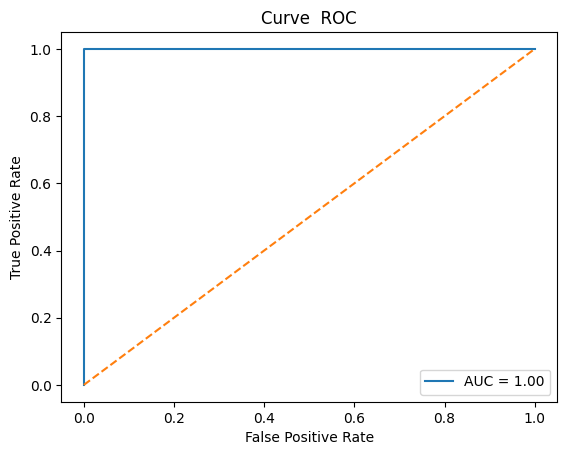

In [12]:
#Qué son estas metricas
y_proba = modelo.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test,y_proba)
auc = roc_auc_score(y_test, y_proba)

#Cóm interpretar el gráfico
plt.plot(fpr,tpr,label=f'AUC = {auc:.2f}')
plt.plot([0,1],[0,1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curve  ROC')
plt.legend()
plt.show()